In [1]:
import networkx as nx
import numpy as np
from trainer import Trainer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load data

In [2]:
adjlist = nx.read_adjlist("karate_club.adjlist", nodetype=int)
adj = nx.to_numpy_array(adjlist)
labels = np.loadtxt("karate_label.txt")

# Set hyperparameters

In [3]:
dim = 4
epoch = 300
n_node = adj.shape[0]
lr = 0.01

# Training

Epoch: 0, Loss: 1580.1532398041757
Epoch: 1, Loss: 434.0993063186803
Epoch: 2, Loss: 270.9844363205735
Epoch: 3, Loss: 210.0564962622056
Epoch: 4, Loss: 179.99281034590814
Epoch: 5, Loss: 162.80025086080855
Epoch: 6, Loss: 151.99291065216312
Epoch: 7, Loss: 144.71940994238065
Epoch: 8, Loss: 139.55385904346795
Epoch: 9, Loss: 135.71605192660314
Epoch: 10, Loss: 132.75011296226856
Epoch: 11, Loss: 130.37619645343807
Epoch: 12, Loss: 128.4158395470763
Epoch: 13, Loss: 126.75172671352931
Epoch: 14, Loss: 125.30478246037808
Epoch: 15, Loss: 124.02054275525656
Epoch: 16, Loss: 122.8607543815514
Epoch: 17, Loss: 121.79804714605577
Epoch: 18, Loss: 120.81247666870624
Epoch: 19, Loss: 119.8892392521456
Epoch: 20, Loss: 119.01713872605299
Epoch: 21, Loss: 118.18754509488483
Epoch: 22, Loss: 117.39367986555033
Epoch: 23, Loss: 116.6301211061588
Epoch: 24, Loss: 115.89245780530072
Epoch: 25, Loss: 115.17704652202087
Epoch: 26, Loss: 114.48083860847532
Epoch: 27, Loss: 113.80125641926116
Epoch: 28

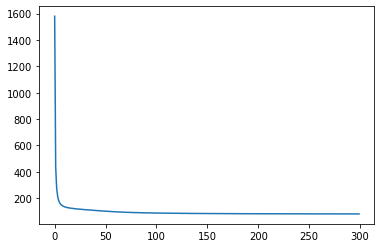

In [4]:
trainer = Trainer(dim, n_node, adj, epoch, lr)
result = trainer.train()
plt.plot(result)

# Visualize embeddings with t-sne

/opt/homebrew/Caskroom/miniconda/base/envs/NetSci/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/NetSci/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


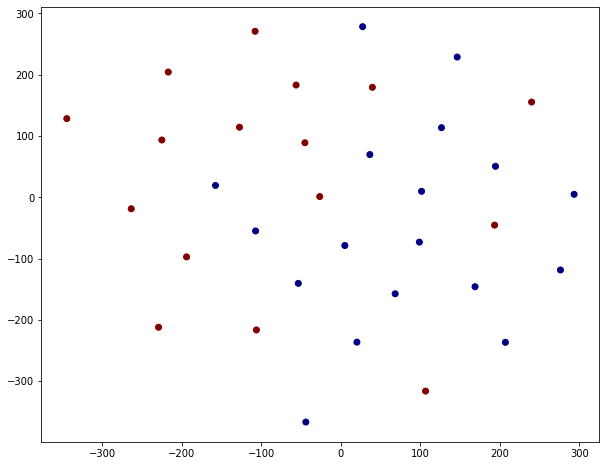

In [29]:
# load the node embedding vector that has been trained. (34, 4) dimension
node_emb = np.copy(trainer.net.node_emb_u.T)

# a parameter for dimension reduction
n_components = 2

# transform the node embedding vector size from (34, 4) into (34, 2) with a T-SNE model
model = TSNE(n_components=n_components)
node_emb_2d = model.fit_transform(node_emb)

# separate the x-axis values and y-axis values
x = node_emb_2d[:, 0]
y = node_emb_2d[:, 1]

# set color options from the labels.
node_colours = labels[:, -1]

# scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=node_colours, cmap="jet")
plt.show()